# Direct from Biot-Savart

$\newcommand{\bfL}{{\bf L}}$
$\newcommand{\bfA}{{\bf A}}$
$\newcommand{\bfB}{{\bf B}}$
$\newcommand{\bfx}{{\bf x}}$
$\newcommand{\bfna}{{\bf\nabla}}$

For a closed loop defined parametrically with a periodic finction $\bfL(t)$, the magnetic field (up to a constant factor) is
$$\bfB(\bfx)=\oint dt\frac{\dot\bfL(t)\times(\bfx-\bfL)}{|\bfx-\bfL|^3}.$$
Let $\bfL(t)=(a\cos(t), a\sin(t), 0)$ be a circle in the $(x,y)$ plane.  Then
$$
\begin{aligned}
\dot\bfL &= (-a\sin(t), a\cos(t), 0),\\
\bfx-\bfL &= (x-a\cos(t), y-b\sin(t), z),\\
\dot\bfL\times(\bfx-\bfL) &= (a\cos(t)z, a\sin(t)z, -a\sin(t)(y-a\sin(t))-a\cos(t)(x-a\cos(t))).
\end{aligned}
$$
The field is then
$$\bfB(a, \bfx) = a\oint dt\frac{(\cos(t)z, \sin(t)z, -\sin(t)(y-a\sin(t))-\cos(t)(x-a\cos(t)))}
{[(x-a\cos(t))^2 + (y-a\sin(t))^2 + z^2]^{3/2}}.$$

In [7]:
import scipy.integrate as integrate
import numpy as np

def dB(x, y, z, a, h, t):
    cos = np.cos(t)
    sin = np.sin(t)
    num = np.array([cos*z, sin*z, -sin*(y-a*sin) - cos*(x-a*cos)])
    den = (x-a*cos)**2 + (y-a*sin)**2 + z**2
    den *= np.sqrt(den)
    return num/den
    
def loop_B(x, y, z, a):
    return integrate.quad_vec(lambda t: dB(x, y, z, a, t), 0, 2*np.pi)

loop_B(1, 2, 3, 0.1) # returns tuple (result, error)
    

(array([0.00385284, 0.00770569, 0.00557187]), 1.217040205100065e-14)

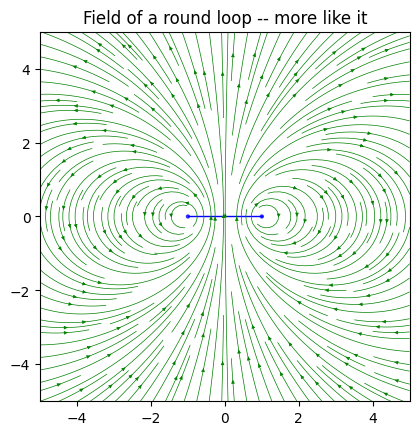

In [47]:
import matplotlib.pyplot as plt

def mark_loop(ax, x, z, a, color):
    ax.add_patch(Circle((x-a, z), 0.04, color=color, alpha=0.7))
    ax.add_patch(Circle((x+a, z), 0.04, color=color, alpha=0.7))
    ax.add_artist(lines.Line2D([x-a, x+a], [z, z], linewidth=1, color=color))

fig = plt.figure()
ax  = fig.add_subplot(1, 1, 1)

xmin, xmax = -5, 5
zmin, zmax =  -5, 5
xx, zz = np.linspace(xmin, xmax, 151), np.linspace(zmin, zmax, 151)
xx_grid, zz_grid = np.meshgrid(xx, zz)

B = loop_B(xx_grid, 0, zz_grid, 1)[0]
if 1:
    mark_loop(ax, 0, 0, 1, 'blue')
    ax.streamplot(xx_grid, zz_grid, B[0], B[2], density=2, color='g',
                    linewidth=0.5, cmap=plt.cm.viridis, arrowsize=0.5)
    ax.set_aspect('equal')
    ax.set_title('Field of a round loop -- more like it')
    plt.show()

## Field of two non-concetric loops

The field created by two loops with radii $a$ and $a_2$, currents $I=1$ and $I_2$, centered at $(0,0,0)$ and $(\xi_2,0,0)$:
$$
\bfB(a,x,y,z) + I_2\bfB(a_2,x-\xi_2,y,z)
$$

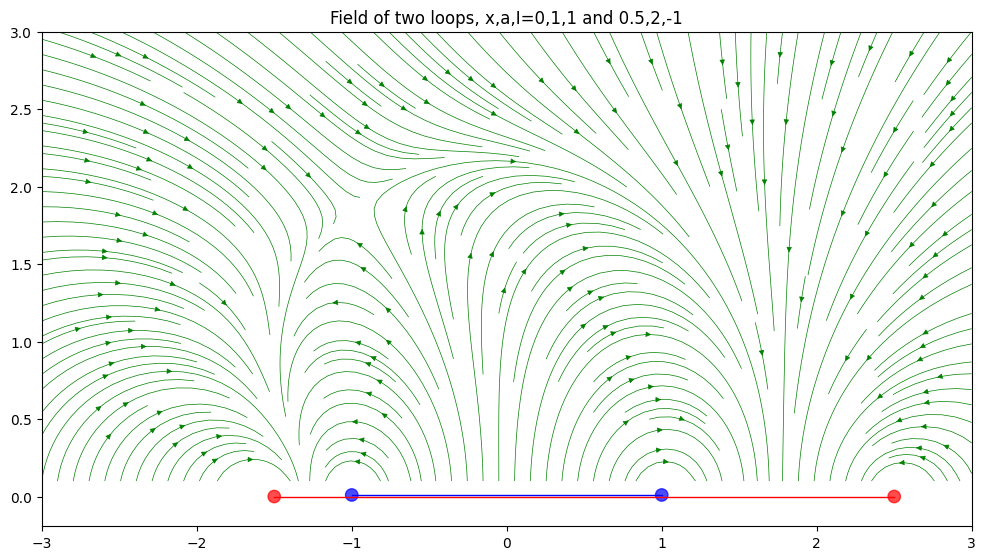

In [53]:
from matplotlib.patches import Circle
import matplotlib.lines as lines

xmin, xmax = -3, 3
zmin, zmax =  0.1, 3
xx, zz = np.linspace(xmin, xmax, 150), np.linspace(zmin, zmax, 150)
xx_grid, zz_grid = np.meshgrid(xx, zz)

a1, a2 = 1, 2     # radii of loops, cm
x1, x2 = 0, 0.5   # loop x-centers
z1, z2 = 0.01, 0  # elevations of loops
I1, I2 = 1, -1    # currents, clockwise if negative

B = I1*loop_B(xx_grid - x1, 0, zz_grid - z1, a1)[0] + \
    I2*loop_B(xx_grid - x2, 0, zz_grid - z2, a2)[0]
# print(B)
if 1: 
    fig = plt.figure(figsize=(12,8))
    ax  = fig.add_subplot(1, 1, 1)
    mark_loop(ax, x1, z1, a1, 'blue')
    mark_loop(ax, x2, z2, a2, 'red')
    ax.streamplot(xx_grid, zz_grid, B[0], B[2], density=2, color='g',
                    linewidth=0.5, cmap=plt.cm.viridis, arrowsize=0.8)
    ax.set_aspect('equal')
    ax.set_title(f'Field of two loops, x,a,I={x1},{a1},{I1} and {x2},{a2},{I2}')
    plt.show()

## Vector potential

Biot-Savart for the field $\bfB=\bfna\times\bfA$ can be written in terms of $\bfA$ whose expression in terms of the current is similar to that of electrostatic potential of charges.  Piecewise, the direction of the vector potential is the same as that of the current:
$$\bfA(\bfx)=\oint dt\frac{\dot\bfL(t)}{|\bfx-\bfL|}.$$
If the currents are localized in the $(x,y)$ plane and the configuration is symmetric about the $x$ axis (or the plane $y=0$), the vector $\bfA$ at $y=0$ is directed along the $y$ axis.  At any point, $A_z\equiv0$, because the currents have no $z$ component.

Due to the mirror symmetry, the magnetic field at $y=0$ lies in that plane.  So we restrict the analysis to 2D field lines shown in the chart above.

We have
$$
B_x = \partial_yA_z - \partial_zA_y,\quad
B_z = \partial_xA_y - \partial_yA_x.
$$
As $A_x$ is an even function of $y$, its derivative at zero vanishes, and the field in the target plane is defined by the "stream function" $A=A_y(x,z)$
$$ (B_x, B_z) = (-\partial_z A, \partial_x A) = (\nabla A)\times{\bf e}_y.$$
The field lines in the plane are the lines of constant $A(x,z)$.


In [49]:
import scipy.integrate as integrate
import numpy as np

def dA(x, y, z, a, t):
    cos = np.cos(t)
    sin = np.sin(t)
    num = np.array([-sin, cos, 0])
    den = np.sqrt((x-a*cos)**2 + (y-a*sin)**2 + z**2)
    #print(f'num: {num}', flush=True)
    #print(f'den: {den}', flush=True)
    return np.outer(num, 1.0/den) # looks fucked up

def dAy(x, z, a, t):
    cos = np.cos(t)
    sin = np.sin(t)
    return cos/np.sqrt((x-a*cos)**2 + (a*sin)**2 + z**2)
    
def loop_A(x, y, z, a):
    return integrate.quad_vec(lambda t: dA(x, y, z, a, t), 0, 2*np.pi)

def loop_Ay(x, z, a):
    return integrate.quad_vec(lambda t: dAy(x, z, a, t), 0, 2*np.pi)

print(f'loopA(1,2,3,0.1)={loop_A(1, 2, 3, 0.1)}') # returns tuple (result, error)
print(f'loop_Ay(1,3,0.1)={loop_Ay(1, 3, 0.1)}')
    

loopA(1,2,3,0.1)=(array([[-0.01198754],
       [ 0.00599377],
       [ 0.        ]]), 5.025145250775618e-14)
loop_Ay(1,3,0.1)=(np.float64(0.009921561705843447), 4.208142062434201e-14)


minAy=-3.2425292276493614, maxAy=4.390800855359582


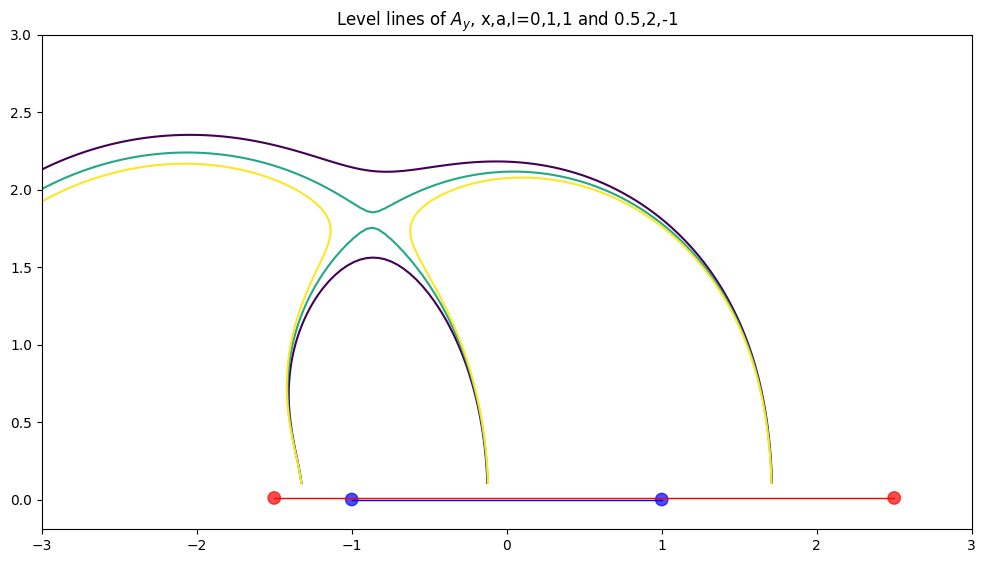

In [50]:
from matplotlib.patches import Circle
import matplotlib.lines as lines

# rewrite earlier settings:
z1, z2 = 0, 0.01
Ay = I1*loop_Ay(xx_grid - x1, zz_grid - z1, a1)[0] + \
     I2*loop_Ay(xx_grid - x2, zz_grid - z2, a2)[0]
if 1:
    fig = plt.figure(figsize=(12,8))
    ax  = fig.add_subplot(1, 1, 1)
    mark_loop(ax, x1, z1, a1, 'blue')
    mark_loop(ax, x2, z2, a2, 'red')
    print(f'minAy={np.min(Ay)}, maxAy={np.max(Ay)}')
    levels = [0.12, 0.126, 0.13]
    ax.contour(xx_grid, zz_grid, Ay, levels)
    ax.set_aspect('equal')
    ax.set_title(f'Level lines of $A_y$, x,a,I={x1},{a1},{I1} and {x2},{a2},{I2}')
    plt.show()

## Parameter optimization

The two non-concentric loops, one inside the other, can create an X-point of zero field.  The same can be done (and easier computed) by three or four straight parallel condictors, but a loop allows for multiple windings to make a stronger field and its gradient.  Given the ease of Biot-Savart integration, more general configurations involving multiple circular or eliiptical loops can be used.  It appears though that circular loops provide enough degrees of freedom, though.  One can play with two loops and their 5 parameters ($x_1$ is just a translation of the whole configuration and can be set to 0) to optimize the X-point above to desired geometry.

First, find the position of the null of $\bfB$. 

In [62]:
from scipy.optimize import fsolve, root


def Bxz(xz, x1, x2, z1, z2, a1, a2, I1, I2):
    x, z = xz
    B1 = loop_B(x - x1, 0, z - z1, a1)[0]
    B2 = loop_B(x - x2, 0, z - z2, a2)[0]
    # print(f'B1={B1}', flush=True)
    return np.array([I1*B1[0] + I2*B2[0], I1*B1[2] + I2*B2[2]])

a1, a2 = 1, 2     # radii of loops, cm
x1, x2 = 0, 0.5   # loop x-centers
z1, z2 = 0.01, 0  # elevations of loops
I1, I2 = 1, -1    # currents, clockwise if negative
if 1:
    xz_guess = np.array([-1., 2.])
    if 0:
        fsolve_result = fsolve(lambda xz: Bxz(xz, x1, x2, z1, z2, a1, a2, I1, I2), xz_guess)
        print(f'fsolve: {fsolve_result}')
    root_result = root(lambda xz: Bxz(xz, x1, x2, z1, z2, a1, a2, I1, I2), xz_guess)
    print(f'root: {root_result}')



root:  message: The solution converged.
 success: True
  status: 1
     fun: [-1.480e-11  3.811e-11]
       x: [-1.002e+00  1.838e+00]
  method: hybr
    nfev: 13
    fjac: [[-2.008e-01  9.796e-01]
           [-9.796e-01 -2.008e-01]]
       r: [ 1.621e-01 -8.539e-02 -1.250e-01]
     qtf: [ 7.952e-10  1.355e-10]


In [ ]:
def optimize_saddle():
    def utility(x1, x2):
        root_result = root(lambda xz: Bxz(xz[0], xz[1], x1, x2, a1, a2, I1, I2), xz_guess)
        null_z = root_result.x[1]
        return (null_z - 1.5)**2
    